# 1.4. Support Vector Machines
http://scikit-learn.org/stable/modules/svm.html

## 1.4.1. Classification

In [2]:
from sklearn import svm #SVM 로드

X = [[0, 0], [1, 1]]
y = [0, 1]

clf = svm.SVC()
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
clf.fit(X, y) #fit으로 학습. (input, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
clf.predict([[2., 2.]]) #1로 예측 (Classification)
#학습 이후엔 예측 모델로 활용할 수 있다.

array([1])

SVMs 결정 함수는 지원 벡터라고 불리는 훈련 데이터의 세트에 의존한다. 이러한 지원 벡터의 속성을 support_vectors_, support_, n_support등으로 확인해 볼 수 있다.

In [4]:
# get support vectors
clf.support_vectors_ #벡터 출력

array([[ 0.,  0.],
       [ 1.,  1.]])

In [5]:
# get indices of support vectors
clf.support_ #벡터 인덱스 출력

array([0, 1], dtype=int32)

In [6]:
# get number of support vectors for each class
clf.n_support_  #각 벡터 클래스의 수 출력

array([1, 1], dtype=int32)

## 1.4.1.1. Multi-class classification

n_class에서 n_class * (n_class - 1) / 2 만큼의 분류자가 생성된다.

분류자의 인터페이스를 제공하기 위해 decision_function_shape 옵션을 사용할 수 있다.

In [7]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]

clf = svm.SVC(decision_function_shape='ovo')
#decision_function_shape : ‘ovo’, ‘ovr’ or None, default=None
#분류자로 1 대 vs 나머지 ('ovr') 결정 함수로 반환할지, :: (n_samples, n_classes) 
#libsvm의 원래 one-vs-one ('ovo') 결정 함수를 반환할지. :: (n_samples, n_classes * (n_classes - 1) / 2)
#None의 기본값은 현재 이전 버전과의 호환성을 위해 'ovo'로 작동

clf.fit(X, Y) #데이터 학습
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
dec = clf.decision_function([[1]])
#decision_function(X) : X와 분리된 초 평면과의 거리를 반환
dec.shape[1] # 4 classes: 4*3/2 = 6 #OVO

6

In [9]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
#decision_function(X) : X와 분리된 초 평면과의 거리를 반환
dec.shape[1] # 4 classes #OVR

4

LinearSVC는 "one-vs-the-rest"다중 클래스 전략을 구현하여 n_class 모델을 학습한다. 클래스가 두 개인 경우 하나의 모델만 학습

In [10]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y) #학습

dec = lin_clf.decision_function([[1]])
#decision_function(X) : X와 분리된 초 평면과의 거리를 반환
dec.shape[1]

4

## Support Vector Machine Example

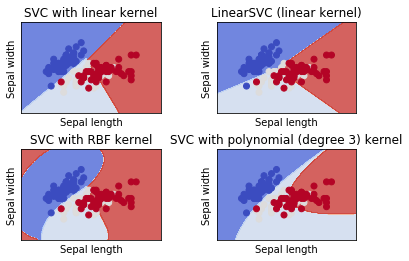

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris() #iris 데이터 셋을 불러 온다.
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#각 행의 0, 1번째 데이터들(:2)만 불러와 트레이닝 데이터로 한다.
    
y = iris.target #정답 레이블
#행의 수는 변하지 않았으므로 (단지 분류자가 4개였던 것을 2개로 줄였을 뿐)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y) #학습
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#kernel : string, optional (default=’rbf’)
#kernel로 알고리즘에서 사용할 커널 유형 지정.
#‘linear’(straight line, 직선), ‘poly’, ‘rbf’(boundry, 계단식 직선), ‘sigmoid’, ‘precomputed’, 'callable'. default는 rbf

#C : float, optional (default=1.0)
#오류에서의 패널티 파라미터. 매끄러운 결정 경계를 정확하게 분류하는 훈련점 사이의 균형을 조정한다.
#C가 클수록 학습점에 맞게 더 구불거리도록 그려진다.

#gamma : float, optional (default=’auto’)
#'rbf', 'poly'및 'sigmoid'에 대한 커널 계수. 감마가 'auto'이면 1 / n_features가 대신 사용된다.
#학습점의 영향력이 어떻게 미치게 되는지.
#감마가 작을수록 직선에 가까워지고(멀리 떨어진 학습점이 영향을 끼친다), 감마가 클수록 곡선모양이 된다.(가까운 학습점이 영향을 끼친다)

#degree : int, optional (default=3)
#커널이 다항('poly')일 경우 함수의 차수. 다른 커널에서는 무시된다.

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #첫 번째 요소의 최소값 - 1, 첫 번째 요소의 최대값 + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #두 번재 요소의 최소값 - 1, 두 번재 요소의 최대값 + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #위에서 생성한 최소, 최대값 사이를 plot_step만큼 증가하는 배열 생성
                     np.arange(y_min, y_max, h)) #위에서 생성한 최소, 최대값 사이를 plot_step만큼 증가하는 배열 생성
#https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/
#메쉬그리드로 각 값이 이루는 조합의 그리드 생성

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)): #각 모델별로 결과값 출력
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #np.ravel() : 인접한 배열을 병합해서 1차원으로 반환
    #https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.ravel.html
    
    #np.c_ : 파라미터의 배열을 합친다.
    #https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.c_.html

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()